In [1]:
# first model
print("This is first model of my thesis")

This is first model of my thesis


In [2]:
#import different library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

In [3]:
#Data preprocesing
#import dataset
data_set = pd.read_csv(r"I:\1.CSE\Thesis\LCPUMLA\Datasets\lung_cancer1.csv")

In [4]:
#show data set's row and column
data_set.shape

(1000, 25)

In [5]:
#data set's head 
data_set.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
#check null value
data_set.isnull().values.any()

False

In [7]:
#data_set correlation heatmap
def correlation_heatmap(data_set, size):
    correlation = data_set.corr()
    
    # print correlation
    # print(correlation)

    # Dividing the plot into subplots for increasing size of plots
    fig, heatmap = plt.subplots(figsize=(size, size))
    
    # show heatmap 
    heatmap.matshow(correlation)
    
    # Adding xticks and yticks
    plt.xticks(range(len(correlation.columns)), correlation.columns, color="red")
    plt.yticks(range(len(correlation.columns)), correlation.columns, color="green", fontsize=30)
    
    # Displaying the graph
    plt.show()

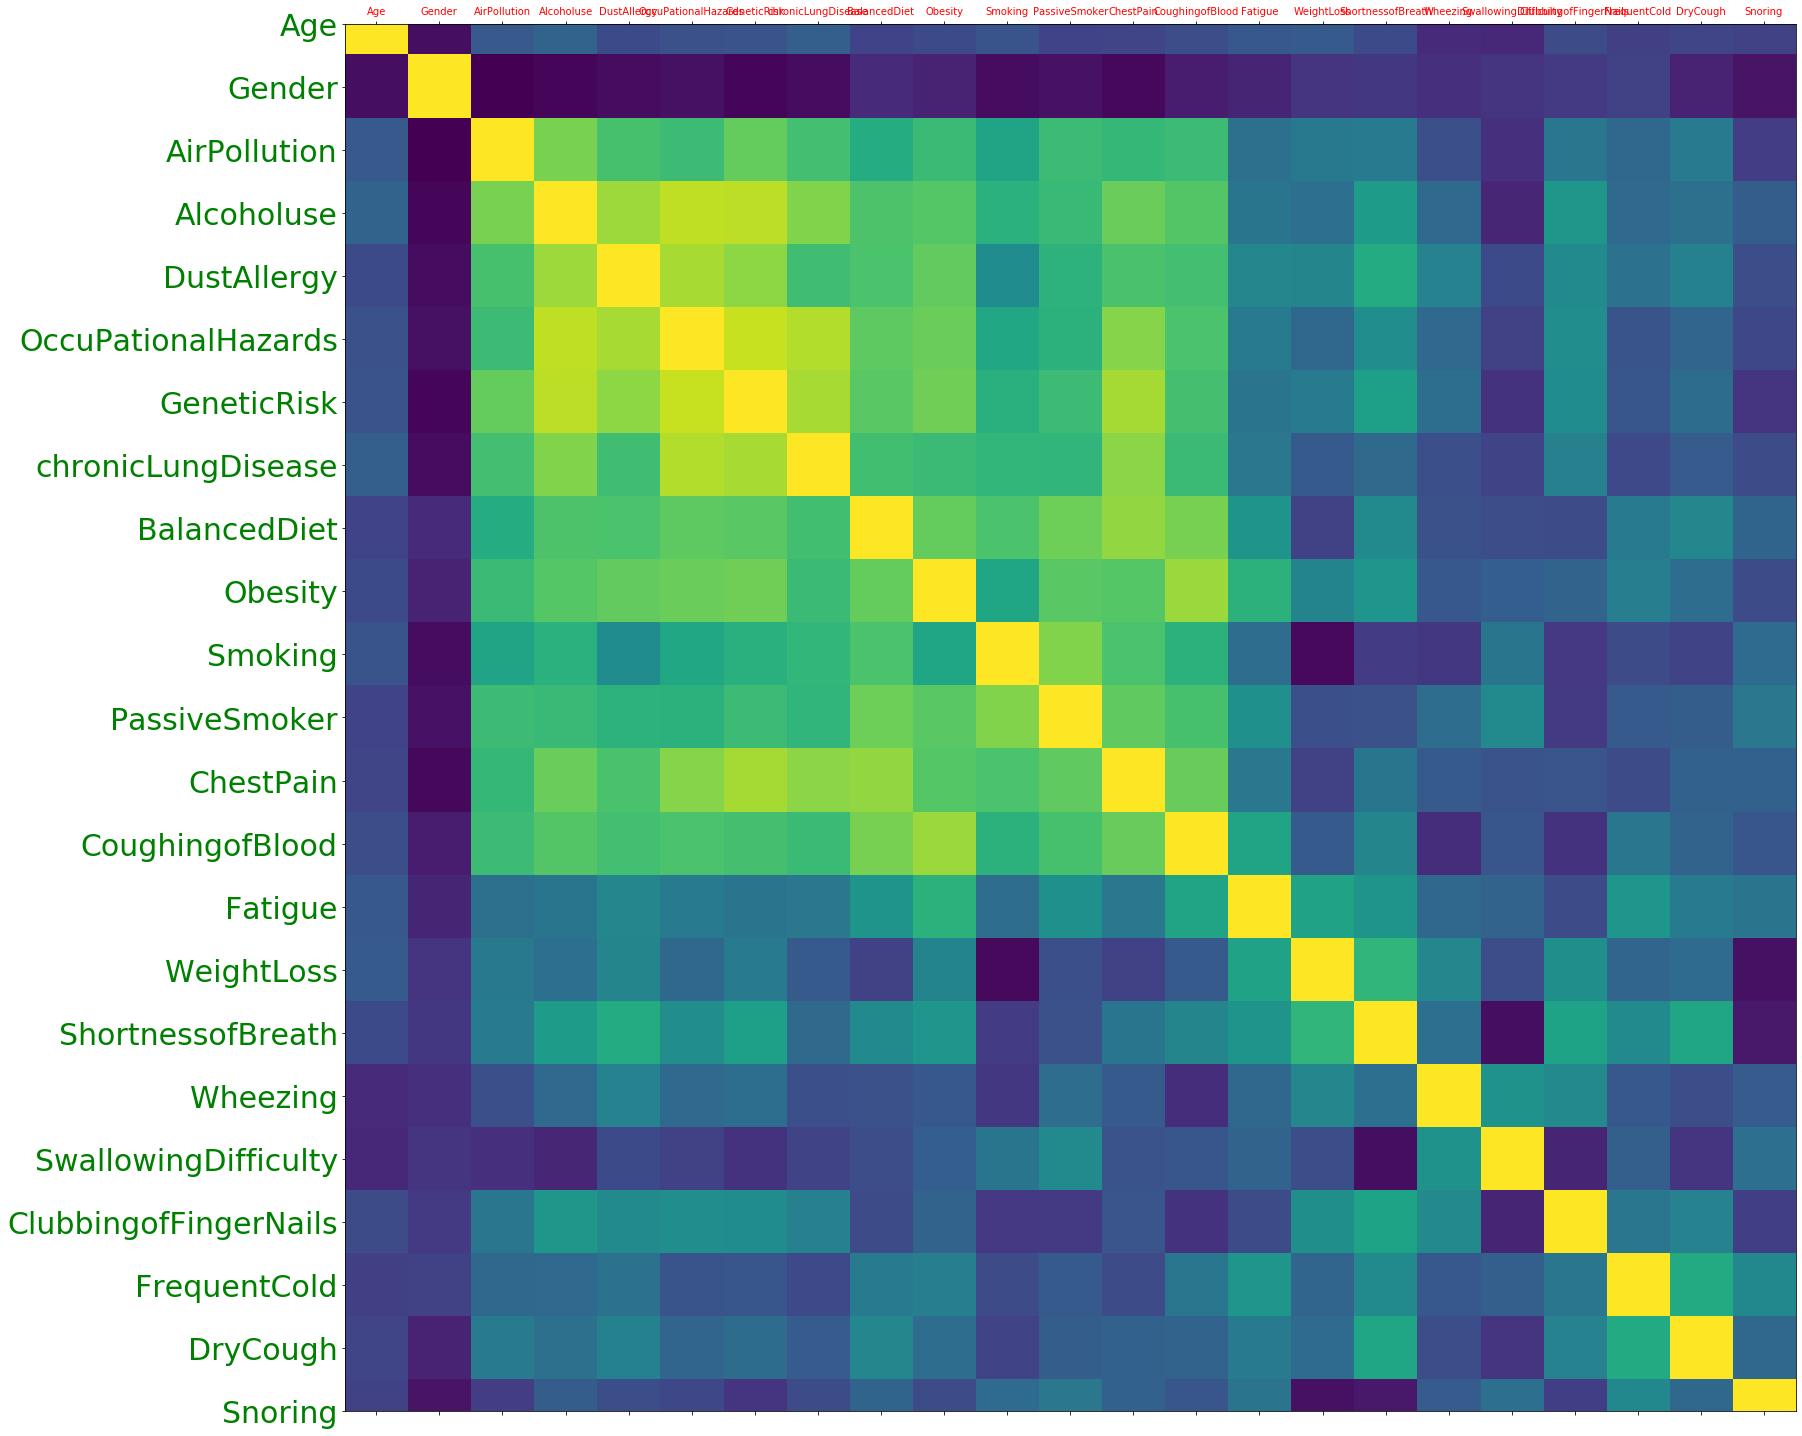

In [8]:
correlation_heatmap(data_set, 26)

In [9]:
data_set.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [10]:
#change level column's value into number
change_level = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
}


data_set["Level"] = data_set["Level"].map(change_level)

# replace patient id 
p_id = data_set["Patient Id"]
# print("pid \n",pid[1])

p_id_len = len(p_id)
# print(p_id_len)

for v in range(p_id_len):
    p_id[v]=v
#     print("patient id value : ", p_id[v])

data_set.head()

C:\Users\mohim\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [11]:
#data spliting
from sklearn.model_selection import train_test_split

features_col = ['Age','Gender','AirPollution','Alcoholuse','DustAllergy','DustAllergy',
                'OccuPationalHazards','GeneticRisk','chronicLungDisease','BalancedDiet','Obesity',
                'Smoking','PassiveSmoker','ChestPain','CoughingofBlood','Fatigue','WeightLoss',
                'ShortnessofBreath','Wheezing','SwallowingDifficulty','ClubbingofFingerNails',
                'FrequentCold','DryCough','Snoring']

predict_col = ['Level']

F = data_set[features_col].values
P = data_set[predict_col].values


# Saving 30% for testing
split_test_size = 0.30


# Splitting
F_train, F_test, P_train, P_test = train_test_split(F, P, test_size = split_test_size, random_state = 42)


#check spliting is accurate or not 
print("{0:0.2f}% in training set".format((len(F_train)/len(data_set.index)) * 100))
print("{0:0.2f}% in test set".format((len(F_test)/len(data_set.index)) * 100)) 


70.00% in training set
30.00% in test set


In [12]:
#model training with naive bayes classifier algorithm
from sklearn.naive_bayes import GaussianNB

#creating model object
nb_model = GaussianNB()

nb_model.fit(F_train, P_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
# performance metrics library
from sklearn import metrics

# returns predicted results
prediction_from_trained_data = nb_model.predict(F_train)
prediction_from_test_data = nb_model.predict(F_test)

# get current accuracy of the model
accuracy_from_trained_data = metrics.accuracy_score(P_train, prediction_from_trained_data)
accuracy_from_test_data = metrics.accuracy_score(P_test, prediction_from_test_data)

In [14]:
print ("Accuracy from trained data of naive bayes model is : {0:.4f}%".format(accuracy_from_trained_data*100))

print ("Accuracy from test data of naive bayes model is : {0:.4f}%".format(accuracy_from_test_data*100))

Accuracy from trained data of naive bayes model is : 88.8571%
Accuracy from test data of naive bayes model is : 89.3333%


In [17]:
#apply others machine learning algorithms 
#-------------------svm-----------------
from sklearn.svm import SVC
from sklearn import metrics

svm_model = SVC(gamma="auto")
svm_model.fit(F_train, P_train.ravel())

# svm_model.score(F_test, P_test)
# svm_model.score(F_train, P_train)

# predicton results 
svm_model_prediction_from_trained_data = svm_model.predict(F_train)
svm_model_prediction_from_test_data = svm_model.predict(F_test)

# get current accuracy of the model
svm_model_accuracy_from_trained_data = metrics.accuracy_score(P_train, svm_model_prediction_from_trained_data)
svm_model_accuracy_from_test_data = metrics.accuracy_score(P_test, svm_model_prediction_from_test_data)

# print(metrics.accuracy_score(P_train, pred_train))
# print(metrics.accuracy_score(P_test, predi_test))

In [18]:
#output 
print ("Accuracy from trained data of svm model is : {0:.4f}%".format(svm_model_accuracy_from_trained_data*100))

print ("Accuracy from test data of svm model is : {0:.4f}%".format(svm_model_accuracy_from_test_data*100))

Accuracy from trained data of svm model is : 100.0000%
Accuracy from test data of svm model is : 100.0000%


In [ ]:
#-------------------dct-----------------